<a href="https://colab.research.google.com/github/azkaarahiilaa/Desain_dan_Analisis_Algoritma/blob/main/latihan9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
#page rank dengan 100 iterasi berdasarkab data adjacency matrix,
import numpy as np

# Define the adjacency matrix
adjacency_matrix = np.array([[0, 1, 0, 0],
                             [0, 0, 1, 0],
                             [0, 1, 0, 1],
                             [1, 0, 1, 0]])

# Set the damping factor
damping_factor = 0.85

# Initialize PageRank values
num_pages = len(adjacency_matrix)
page_rank = np.ones(num_pages) / num_pages

# Number of iterations
num_iterations = 100

for _ in range(num_iterations):
    new_page_rank = np.zeros(num_pages)
    for j in range(num_pages):
        # Calculate the pagerank contribution from each linking page
        linking_pages = [k for k in range(num_pages) if adjacency_matrix[k, j] == 1]
        for linking_page in linking_pages:
            new_page_rank[j] += page_rank[linking_page] / np.sum(adjacency_matrix[linking_page, :])
        new_page_rank[j] = damping_factor * new_page_rank[j] + (1 - damping_factor) / num_pages
    page_rank = new_page_rank

# Print the final PageRank values
for page, rank in enumerate(page_rank):
    print(f"PR(page {page + 1}) = {rank:.3f}")


PR(page 1) = 0.122
PR(page 2) = 0.302
PR(page 3) = 0.378
PR(page 4) = 0.198


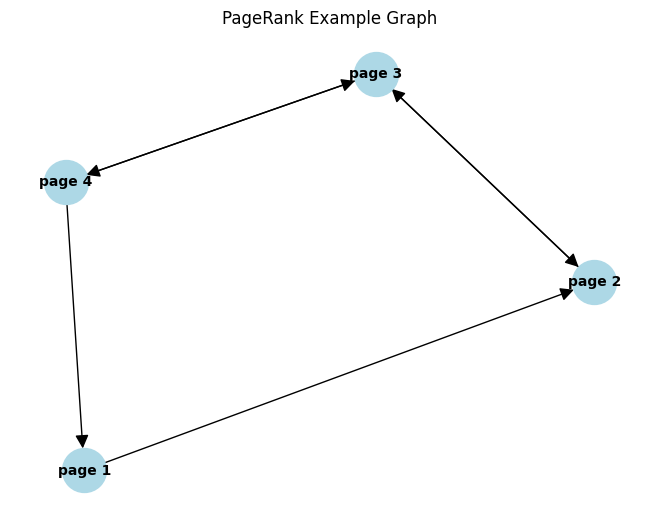

In [20]:
#membuat graph dari adjacency matrix
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Define the adjacency matrix
adjacency_matrix = np.array([[0, 1, 0, 0],
                             [0, 0, 1, 0],
                             [0, 1, 0, 1],
                             [1, 0, 1, 0]])

# Create the directed graph
G = nx.DiGraph()

# Add nodes
num_pages = len(adjacency_matrix)
G.add_nodes_from(range(num_pages))

# Add edges based on the adjacency matrix
for i in range(num_pages):
    for j in range(num_pages):
        if adjacency_matrix[i, j] == 1:
            G.add_edge(i, j)

# Draw the graph
pos = nx.spring_layout(G)  # Layout the graph
labels = {i: f"page {i+1}" for i in range(num_pages)}
nx.draw(G, pos, with_labels=True, labels=labels, node_size=1000, node_color='lightblue', font_size=10, font_color='black', font_weight='bold', arrowsize=20)
plt.title("PageRank Example Graph")
plt.show()


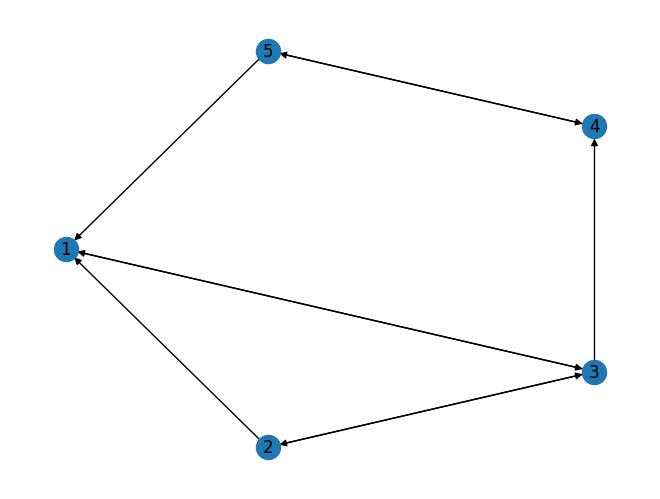

In [21]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
myWeb = nx.DiGraph()
myPages = range(1,5)
connections = [(1,3),(2,1),(2,3),(3,1),(3,2),(3,4),(4,5),(5,1),(5,4)]
myWeb.add_nodes_from(myPages)
myWeb.add_edges_from(connections)
pos=nx.shell_layout(myWeb)
nx.draw(myWeb, pos, arrows=True, with_labels=True)
plt.show()

In [25]:
#implementasu algoritma pagerank

import networkx as nx
import numpy as np

def CreatPageRank(aGraph):
    nodes_set = len(aGraph)
    M = nx.to_numpy_array(aGraph)
    outwards = np.squeeze(np.asarray(np.sum(M, axis=1)))
    prob_outwards = np.array(1.0 / outwards)
    G = np.multiply(M, prob_outwards[:, np.newaxis])

    p = np.ones(nodes_set) / float(nodes_set)
    return G, p

#contoh penggunaan
myWeb = nx.DiGraph()
connections = [(1,3), (2,1), (2,3), (3,1), (3,2), (3,4), (4,5), (5,1), (5,4)]
myWeb.add_edges_from(connections)

G, p = CreatPageRank(myWeb)
print(G)


[[0.         1.         0.         0.         0.        ]
 [0.33333333 0.         0.33333333 0.33333333 0.        ]
 [0.5        0.5        0.         0.         0.        ]
 [0.         0.         0.         0.         1.        ]
 [0.5        0.         0.         0.5        0.        ]]


In [27]:
# studi kasus 2
import numpy as np

adjacency_matrix = np.array([[0, 1, 1, 1, 0],
                             [0, 0, 1, 0, 0],
                             [1, 0, 0, 0, 0],
                             [0, 0, 1, 1, 0],
                             [0, 0, 1, 1, 0]])

pagerank = np.array([1, 1, 1, 1, 1], dtype=float)
damping_factor = 0.85
num_iterations = 100

for _ in range(num_iterations):
    new_pagerank = np.zeros(pagerank.shape, dtype=float)

    for i in range(adjacency_matrix.shape[0]):
        for j in range(adjacency_matrix.shape[1]):
            # hitung jumlah tautan keluar dari halaman i
            num_outlinks = np.sum(adjacency_matrix[i, :])

            if num_outlinks > 0:
                new_pagerank[j] += (damping_factor * pagerank[i] / num_outlinks)

    # normalisasi pagerank
    new_pagerank += (1 - damping_factor) / len(pagerank)

    # perbarui nilai pagerank
    pagerank = new_pagerank

# hasil pagerank
print("Hasil PageRank:")
print(pagerank)



Hasil PageRank:
[1.72510772e+45 1.72510772e+45 1.72510772e+45 1.72510772e+45
 1.72510772e+45]


<ipython-input-36-b8c2d193eed3>:10: RuntimeWarning: divide by zero encountered in divide
  prob_outwards = np.array(1.0 / outwards)
<ipython-input-36-b8c2d193eed3>:11: RuntimeWarning: invalid value encountered in multiply
  G = np.multiply(M, prob_outwards[:, np.newaxis])


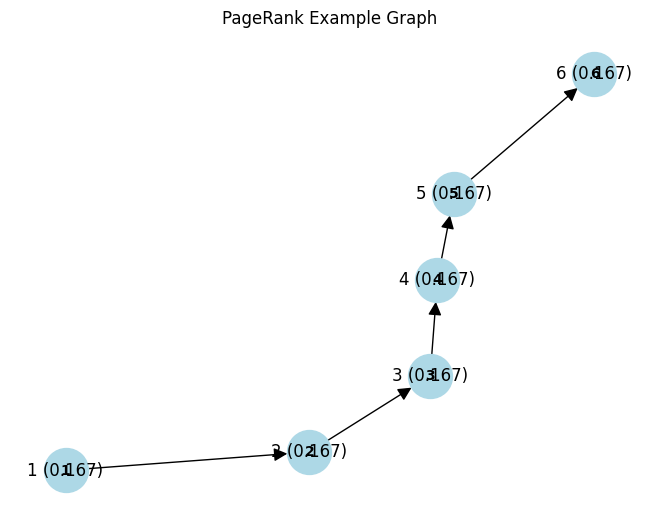

In [36]:
# latihan 1
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def CreatePageRank(aGraph):
    nodes_set = len(aGraph)
    M = nx.to_numpy_array(aGraph)  # Menggunakan metode to_numpy_array
    outwards = np.squeeze(np.asarray(np.sum(M, axis=1)))
    prob_outwards = np.array(1.0 / outwards)
    G = np.multiply(M, prob_outwards[:, np.newaxis])

    p = np.ones(nodes_set) / float(nodes_set)
    return G, p

myWeb = nx.DiGraph()
connections = [(1, 2), (2, 3), (3, 4), (4, 5), (5, 6)]
myWeb.add_edges_from(connections)

G, p = CreatePageRank(myWeb)

# Draw the graph
pos = nx.spring_layout(myWeb)
labels = {i+1: f"{i+1}" for i in range(len(myWeb))}
nx.draw(myWeb, pos, with_labels=True, labels=labels, node_size=1000, node_color='lightblue', font_size=10, font_color='black', font_weight='bold', arrowsize=20)

# Add the PageRank values to the graph
for node, rank in enumerate(p):
    nx.draw_networkx_labels(myWeb, pos, labels={node+1: f"{node+1} ({rank:.3f})"})

plt.title("PageRank Example Graph")
plt.show()


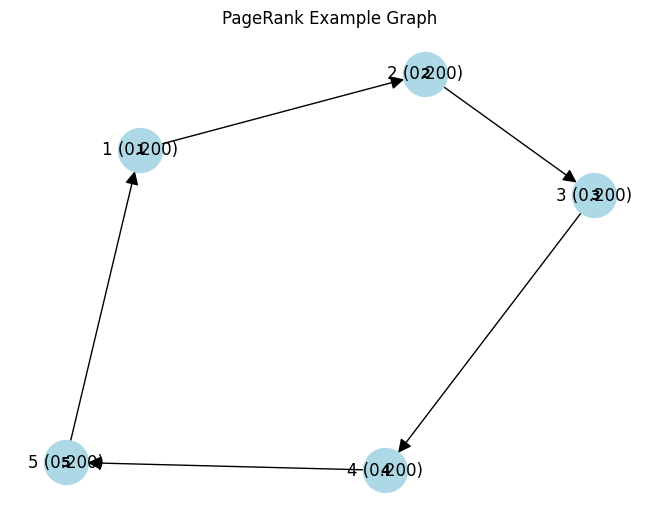

In [37]:
# latihan 2
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def CreatePageRank(aGraph):
    nodes_set = len(aGraph)
    M = nx.to_numpy_array(aGraph)  # Menggunakan metode to_numpy_array
    outwards = np.squeeze(np.asarray(np.sum(M, axis=1)))
    prob_outwards = np.array(1.0 / outwards)
    G = np.multiply(M, prob_outwards[:, np.newaxis])

    p = np.ones(nodes_set) / float(nodes_set)
    return G, p

myWeb = nx.DiGraph()
connections = [(1, 2), (2, 3), (3, 4), (4, 5), (5,1)]
myWeb.add_edges_from(connections)

G, p = CreatePageRank(myWeb)

# Draw the graph
pos = nx.spring_layout(myWeb)
labels = {i+1: f"{i+1}" for i in range(len(myWeb))}
nx.draw(myWeb, pos, with_labels=True, labels=labels, node_size=1000, node_color='lightblue', font_size=10, font_color='black', font_weight='bold', arrowsize=20)

# Add the PageRank values to the graph
for node, rank in enumerate(p):
    nx.draw_networkx_labels(myWeb, pos, labels={node+1: f"{node+1} ({rank:.3f})"})

plt.title("PageRank Example Graph")
plt.show()



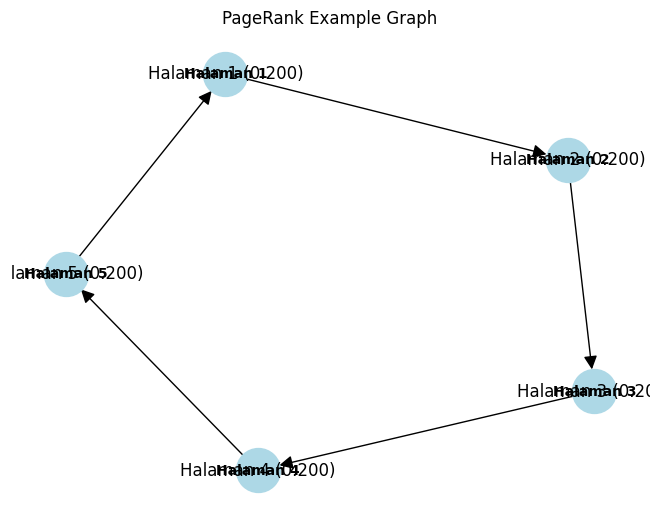

In [32]:
#latihan 3
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def CreatePageRank(aGraph):
    nodes_set = len(aGraph)
    M = nx.to_numpy_array(aGraph)  # Menggunakan metode to_numpy_array
    outwards = np.squeeze(np.asarray(np.sum(M, axis=1)))
    prob_outwards = np.where(outwards != 0, 1.0 / outwards, 0)  # Menangani pembagian dengan nol
    G = np.multiply(M, prob_outwards[:, np.newaxis])

    p = np.ones(nodes_set) / float(nodes_set)
    return G, p

myWeb = nx.DiGraph()
connections = [(1, 2), (2, 3), (3, 4), (4, 5), (5, 1)]
myWeb.add_edges_from(connections)

G, p = CreatePageRank(myWeb)

# Draw the graph
pos = nx.spring_layout(myWeb)
labels = {i+1: f"Halaman {i+1}" for i in range(len(myWeb))}  # Mengubah indeks ke dalam label
nx.draw(myWeb, pos, with_labels=True, labels=labels, node_size=1000, node_color='lightblue', font_size=10, font_color='black', font_weight='bold', arrowsize=20)

# Add the PageRank values to the graph
for node, rank in enumerate(p):
    nx.draw_networkx_labels(myWeb, pos, labels={node+1: f"Halaman {node+1} ({rank:.3f})"})  # Mengubah indeks ke dalam label

plt.title("PageRank Example Graph")
plt.show()


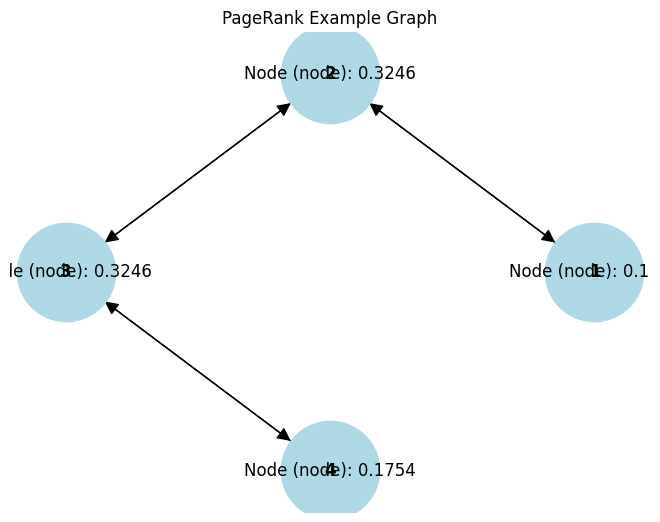

In [33]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes to the graph
nodes = [1, 2, 3, 4]
G.add_nodes_from(nodes)

# Add edges to the graph
edges = [(1, 2), (2, 3), (3, 4), (4, 3), (3, 2), (2, 1)]
G.add_edges_from(edges)

# Calculate the PageRank values for each node
page_rank = nx.pagerank(G, alpha=0.85)

# Draw the graph
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_size=5000, node_color='lightblue', font_size=12, font_color='black', font_weight='bold', arrowsize=20)

# Add the PageRank values to the graph
for node, rank in page_rank.items():
    nx.draw_networkx_labels(G, pos, labels={node: f"Node (node): {rank:.4f}"})

plt.title("PageRank Example Graph")
plt.show()


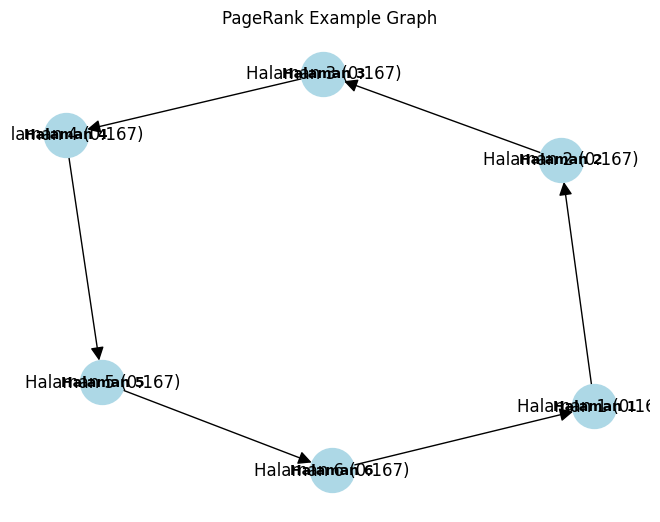

In [39]:
#latihan 4
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def CreatePageRank(aGraph):
    nodes_set = len(aGraph)
    M = nx.to_numpy_array(aGraph)
    outwards = np.squeeze(np.asarray(np.sum(M, axis=1)))
    prob_outwards = np.where(outwards != 0, 1.0 / outwards, 0)
    G = np.multiply(M, prob_outwards[:, np.newaxis])

    p = np.ones(nodes_set) / float(nodes_set)
    return G, p

myWeb = nx.DiGraph()
connections = [(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 1)]
myWeb.add_edges_from(connections)

G, p = CreatePageRank(myWeb)

# Draw the graph
pos = nx.spring_layout(myWeb)
labels = {i+1: f"Halaman {i+1}" for i in range(len(myWeb))}  # Mengubah indeks ke dalam label
nx.draw(myWeb, pos, with_labels=True, labels=labels, node_size=1000, node_color='lightblue', font_size=10, font_color='black', font_weight='bold', arrowsize=20)

# Add the PageRank values to the graph
for node, rank in enumerate(p):
    nx.draw_networkx_labels(myWeb, pos, labels={node+1: f"Halaman {node+1} ({rank:.3f})"})  # Mengubah indeks ke dalam label

plt.title("PageRank Example Graph")
plt.show()


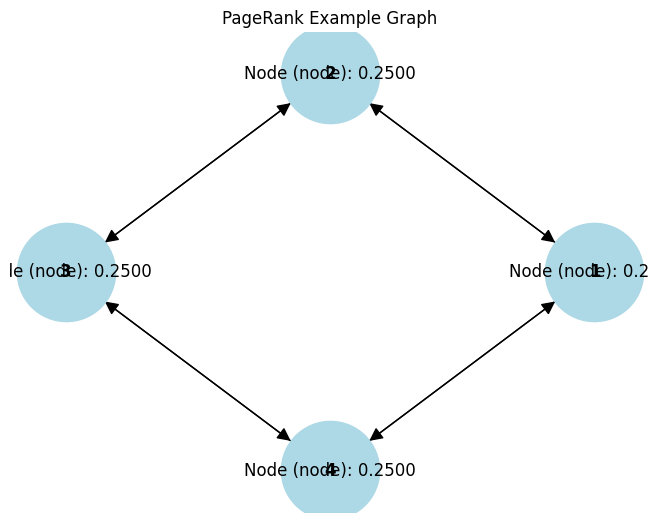

In [40]:
#latihan5

import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes to the graph
nodes = [1, 2, 3, 4]
G.add_nodes_from(nodes)

# Add edges to the graph
edges = [(1, 2), (2, 3), (3, 4), (4, 1), (1, 4), (4, 3), (3, 2), (2, 1)]
G.add_edges_from(edges)

# Calculate the PageRank values for each node
page_rank = nx.pagerank(G, alpha=0.85)

# Draw the graph
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_size=5000, node_color='lightblue', font_size=12, font_color='black', font_weight='bold', arrowsize=20)

# Add the PageRank values to the graph
for node, rank in page_rank.items():
    nx.draw_networkx_labels(G, pos, labels={node: f"Node (node): {rank:.4f}"})

plt.title("PageRank Example Graph")
plt.show()


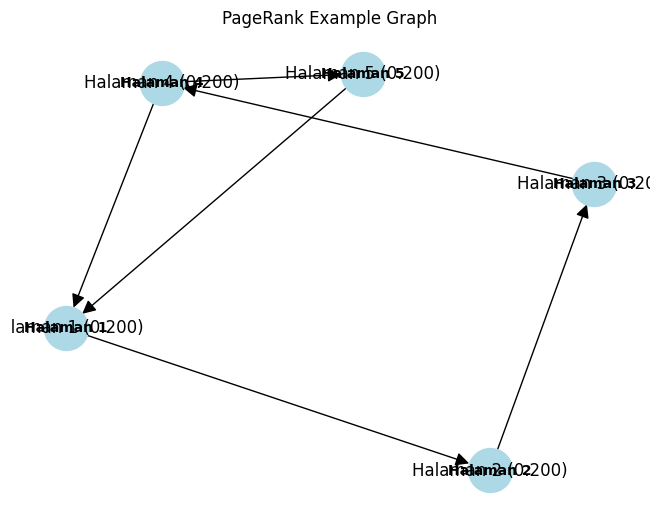

In [41]:
#latihan6
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def CreatePageRank(aGraph):
    nodes_set = len(aGraph)
    M = nx.to_numpy_array(aGraph)
    outwards = np.squeeze(np.asarray(np.sum(M, axis=1)))
    prob_outwards = np.where(outwards != 0, 1.0 / outwards, 0)
    G = np.multiply(M, prob_outwards[:, np.newaxis])

    p = np.ones(nodes_set) / float(nodes_set)
    return G, p

myWeb = nx.DiGraph()
connections = [(1, 2), (2, 3), (3, 4), (4, 5), (4, 1), (5, 1)]
myWeb.add_edges_from(connections)

G, p = CreatePageRank(myWeb)

# Draw the graph
pos = nx.spring_layout(myWeb)
labels = {i+1: f"Halaman {i+1}" for i in range(len(myWeb))}  # Menyesuaikan indeks label
nx.draw(myWeb, pos, with_labels=True, labels=labels, node_size=1000, node_color='lightblue', font_size=10, font_color='black', font_weight='bold', arrowsize=20)

# Add the PageRank values to the graph
for node, rank in enumerate(p):
    nx.draw_networkx_labels(myWeb, pos, labels={node+1: f"Halaman {node+1} ({rank:.3f})"})  # Menyesuaikan indeks label

plt.title("PageRank Example Graph")
plt.show()

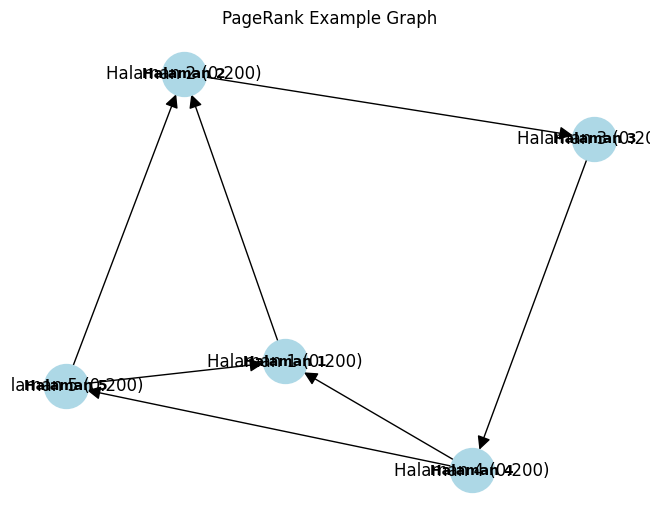

In [42]:
#latihan7
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def CreatePageRank(aGraph):
    nodes_set = len(aGraph)
    M = nx.to_numpy_array(aGraph)
    outwards = np.squeeze(np.asarray(np.sum(M, axis=1)))
    prob_outwards = np.where(outwards != 0, 1.0 / outwards, 0)
    G = np.multiply(M, prob_outwards[:, np.newaxis])

    p = np.ones(nodes_set) / float(nodes_set)
    return G, p

myWeb = nx.DiGraph()
connections = [(1, 2), (2, 3), (3, 4), (4, 5), (4, 1), (5, 1), (5,2)]
myWeb.add_edges_from(connections)

G, p = CreatePageRank(myWeb)

# Draw the graph
pos = nx.spring_layout(myWeb)
labels = {i+1: f"Halaman {i+1}" for i in range(len(myWeb))}  # Menyesuaikan indeks label
nx.draw(myWeb, pos, with_labels=True, labels=labels, node_size=1000, node_color='lightblue', font_size=10, font_color='black', font_weight='bold', arrowsize=20)

# Add the PageRank values to the graph
for node, rank in enumerate(p):
    nx.draw_networkx_labels(myWeb, pos, labels={node+1: f"Halaman {node+1} ({rank:.3f})"})  # Menyesuaikan indeks label

plt.title("PageRank Example Graph")
plt.show()